In [24]:
import quandl
import yfinance as yf
from yahoofinancials import YahooFinancials
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [25]:
# Pull US Treasury Yield data from Quandl API
API_KEY = os.getenv('QUANDL_API_KEY')
quandl.ApiConfig.api_key =API_KEY
yield_data = quandl.get("USTREASURY/YIELD")
yield_data.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [26]:
#Select yields to analyze
yield_curve = yield_data[['3 MO','5 YR','20 YR']]

In [27]:
# Set yield frequency as monthly
yield_curve = yield_curve.asfreq(freq='M').ffill()
yield_curve

,3 MO,5 YR,20 YR
Date,,,
1990-01-31,8.00,8.35,NaN
1990-02-28,8.04,8.44,NaN
1990-03-31,8.04,8.44,NaN
1990-04-30,8.07,9.04,NaN
1990-05-31,8.01,8.56,NaN
...,...,...,...
2020-12-31,0.09,0.36,1.45
2021-01-31,0.09,0.36,1.45
2021-02-28,0.09,0.36,1.45


<AxesSubplot:title={'center':'US Treasury Yield'}, xlabel='Date', ylabel='%'>

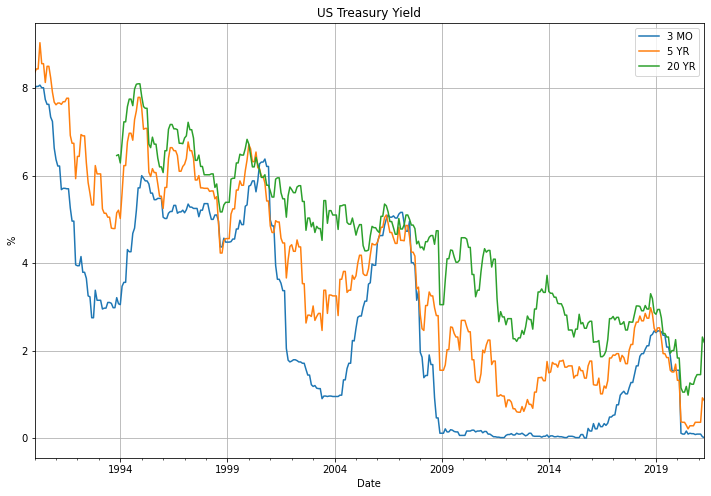

In [28]:
#Plot US Tresury yield curves
yield_curve.plot(figsize = (12,8), title = 'US Treasury Yield', ylabel = '%', grid=True)

In [29]:
#Create the difference between the long and short yield curve; You may select different long term yields (10YR, 20YR etc.)
long_short_diff = yield_curve['5 YR'] - yield_curve['3 MO']
long_short_diff

Date
1990-01-31    0.35
1990-02-28    0.40
1990-03-31    0.40
1990-04-30    0.97
1990-05-31    0.55
              ... 
2020-12-31    0.27
2021-01-31    0.27
2021-02-28    0.27
2021-03-31    0.89
2021-04-30    0.85
Freq: M, Length: 376, dtype: float64

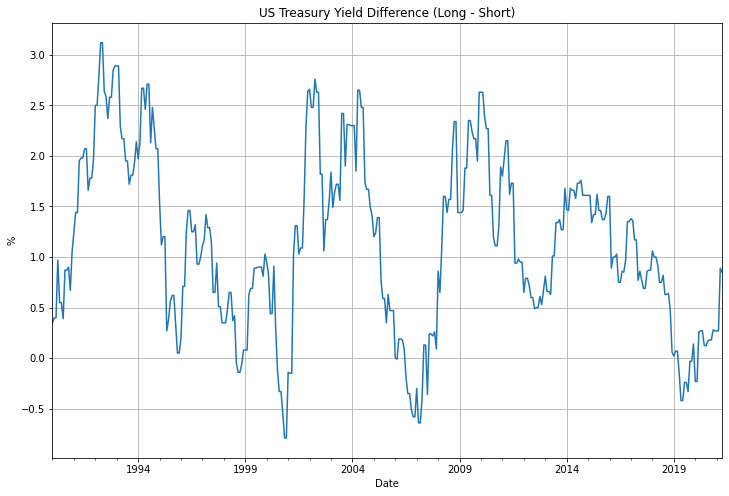

In [30]:
#Plot the difference between the long and short yield curve to identify inverted curve (y value below 0)
long_short_plot = long_short_diff.plot(figsize = (12,8), title = 'US Treasury Yield Difference (Long - Short)', ylabel = '%', grid=True)

In [31]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "1990-01-31" 
end= "2021-05-25"

sp_history = yf.download(ticker, start=start, end=end, progress=False)

In [32]:
# Set frequency to Monthly; Forward fill missing values
sp_history = sp_history['Adj Close'].asfreq(freq='M').ffill()
sp_history

Date
1990-01-31     329.079987
1990-02-28     331.890015
1990-03-31     331.890015
1990-04-30     330.799988
1990-05-31     361.230011
                 ...     
2020-12-31    3756.070068
2021-01-31    3756.070068
2021-02-28    3756.070068
2021-03-31    3972.889893
2021-04-30    4181.169922
Freq: M, Name: Adj Close, Length: 376, dtype: float64

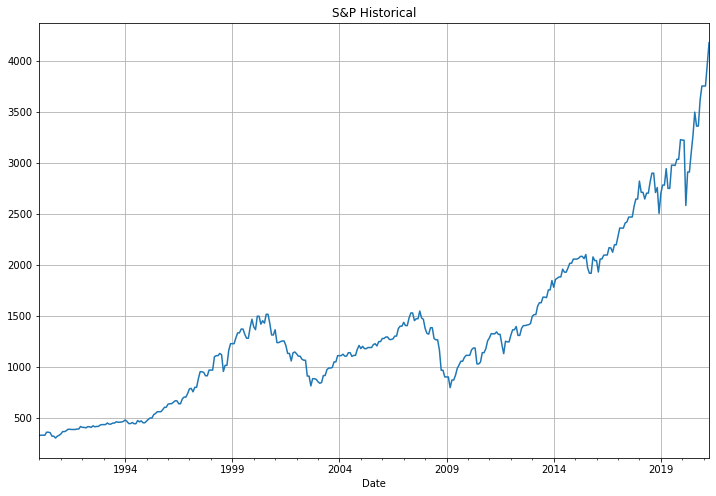

In [33]:
#Plot S&P Index historical data
sp_plot = sp_history.plot(figsize=(12,8), title='S&P Historical', grid=True)

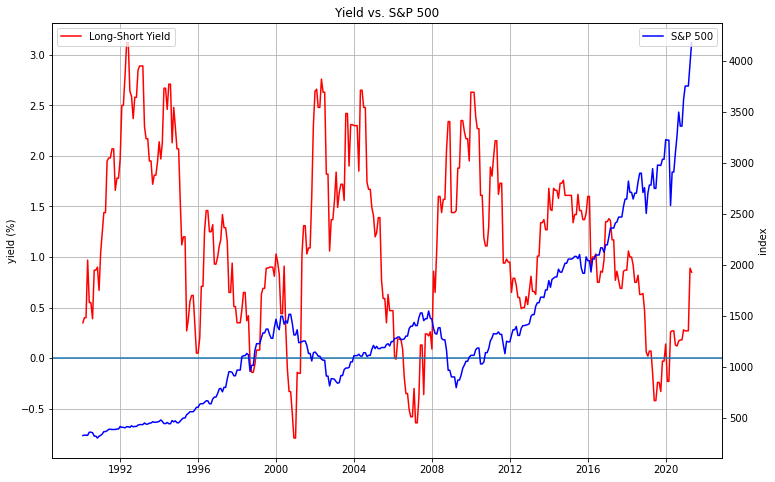

In [34]:
#Long-Short Yield Curve below 0 shows inverted curve.
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(long_short_diff, label ='Long-Short Yield', color='r')
ax.set_ylabel('yield (%)')
plt.grid()
ax.axhline(y=0)
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history, label='S&P 500', color='b')
ax.set_title('Yield vs. S&P 500')
ax2.set_ylabel('index')
ax2.legend(loc='upper right')